In [3]:
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

import numpy as np
import pandas as pd
import pickle

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

colours = [(208/255, 28/255, 139/255),
           (241/255, 182/255, 218/255),
           (184/255, 225/255, 134/255),
           (77/255, 172/255, 38/255)]

def rgb_to_hex(rgb):
    # Ensure the input is a tuple with three floats ranging from 0 to 1
    assert isinstance(rgb, tuple) and len(rgb) == 3
    assert all(0.0 <= value <= 1.0 for value in rgb)
    
    # Scale the values to 0-255 and convert to integers
    scaled_rgb = tuple(int(value * 255) for value in rgb)
    
    # Convert the RGB values to HEX format
    return '#{:02x}{:02x}{:02x}'.format(scaled_rgb[0], scaled_rgb[1], scaled_rgb[2])

hex_colours = [rgb_to_hex(rgb) for rgb in colours]

### Plot points on map

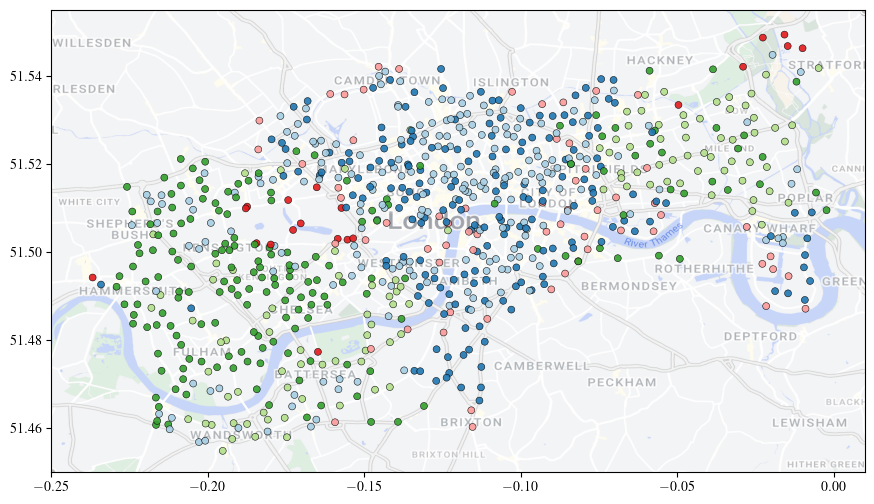

In [5]:
# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Lato']})
rc('text', usetex=True)

import pandas as pd
import numpy as np
import pickle
import matplotlib.colors as mcolors

time_idx = 100
# Load the group assignments
group_memberships = pickle.load(open(f"data/santander_bikes/output/group_memberships/group_memberships_inf_graph.pkl", "rb"))

# Load location and name data
station_long_lat = pickle.load(open("data/santander_bikes/get_and_process_data/network_to_longitude_latitude_dict.pkl", "rb"))
station_names = pickle.load(open("data/santander_bikes/get_and_process_data/network_to_station_dict.pkl", "rb"))

# Create dataframe of station name and location
df_long_lat_stat = pd.DataFrame(index=range(791), columns=['station', 'longitude', 'latitude'])
for idx, long_lat in enumerate(station_long_lat.values()):
    if len(long_lat) > 0:
        df_long_lat_stat.loc[idx, ['longitude', 'latitude']] = long_lat[0]
for idx, name in enumerate(station_names.values()):
    if len(name) > 0:
        df_long_lat_stat.loc[idx, 'station'] = name[0]
df_long_lat_stat['node'] = df_long_lat_stat.index

# Create column for group assignment
B1 = 35
df_long_lat_stat['group'] = group_memberships[time_idx - B1, :]

# Map group index
value_mapping = {value: new_value for new_value, value in enumerate(df_long_lat_stat['group'].unique())}

# Map the original array to the new values
df_long_lat_stat['group'] = df_long_lat_stat['group'].map(value_mapping)

# Colour set
custom_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

lats = []; lons = []; groups = []; colours= []
for index, location_info in df_long_lat_stat.iterrows():
    lats += [location_info.latitude]
    lons += [location_info.longitude]
    groups += [location_info.group]
    colours += [custom_colours[int(location_info.group)]] 

# Create a scatterplot with color proportional to the 'variable'
plt.figure(figsize=(10.5, 6))
scatter = plt.scatter(lons, lats, c=np.array(colours),  
                      s=25, alpha=0.9, edgecolor='black', linewidth=0.4)
# Load the image you want to use as a background
background_image = mpimg.imread('data/santander_bikes/London.png')
plt.imshow(background_image, extent=[-0.25, 0.01, 51.45, 51.555], aspect='auto')

# Add labels and title
plt.xlim([-0.25, 0.01])
plt.ylim([51.45, 51.555])

# Show the plot
plt.savefig('data/santander_bikes/output/plots/example_clustering.pdf',bbox_inches='tight', pad_inches=0.1)
plt.show()

### Examine number of changes

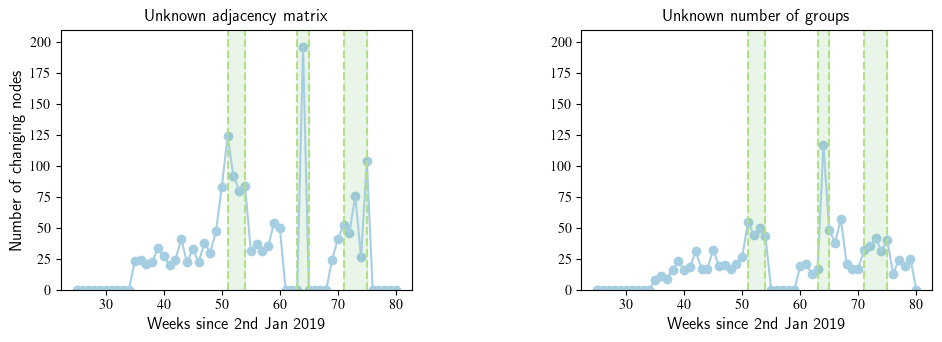

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

time_stamp_range = np.arange(25, 81)

for idx in [4]:
    group_memberships = pickle.load(open(f"data/santander_bikes/output/group_memberships/group_memberships_inf_graph_2_{idx}.pkl", "rb"))
    # tau_inf_groups = pickle.load(open(f"data/santander_bikes/output/tau/tau_store_inf_graph_{idx}.pkl", "rb"))
    # print((np.round(tau_inf_groups.mean(axis=1),3) != 0).sum(axis=1))

    B1 = 25; num_diff = np.zeros((len(time_stamp_range), ))
    for i in range(len(time_stamp_range) - 1):
        num_diff[i] = (group_memberships[i+1, :] != group_memberships[i, :]).sum()
    if np.array(num_diff).sum() != 0:
        axs[0].scatter(time_stamp_range, num_diff, color=colours[0]);
        axs[0].plot(time_stamp_range, num_diff, color=colours[0])

ymin, ymax = 0, 210

axs[0].set_ylim([ymin, ymax])

# Christmas period
axs[0].axvline(x=51, color=colours[2], linestyle='--'); 
axs[0].axvline(x=54, color=colours[2], linestyle='--');
axs[0].fill_betweenx([ymin, ymax], 51, 54, color=colours[3], alpha=0.1)

# First UK lockdown
axs[0].axvline(x=63, color=colours[2], linestyle='--'); 
axs[0].axvline(x=65, color=colours[2], linestyle='--');
axs[0].fill_betweenx([ymin, ymax], 63, 65, color=colours[3], alpha=0.1)

# Easing of lockdown restrictions (phased)
axs[0].axvline(x=71, color=colours[2], linestyle='--'); 
axs[0].axvline(x=75, color=colours[2], linestyle='--');
axs[0].fill_betweenx([ymin, ymax], 71, 75, color=colours[3], alpha=0.1)

axs[0].set_xlabel('Weeks since 2nd Jan 2019', fontsize=12);
axs[0].set_ylabel('Number of changing nodes', fontsize=12);

for idx in [7]:
    group_memberships = pickle.load(open(f"data/santander_bikes/output/group_memberships/group_memberships_inf_groups_{idx}.pkl", "rb"))
    B1 = 25; num_diff = np.zeros((len(time_stamp_range), ))
    for i in range(len(time_stamp_range) - 1):
        num_diff[i] = (group_memberships[i+1, :] != group_memberships[i, :]).sum()
    if np.array(num_diff).sum() != 0:
        axs[1].scatter(time_stamp_range, num_diff, color=colours[0]);
        axs[1].plot(time_stamp_range, num_diff, color=colours[0])

axs[1].set_ylim([ymin, ymax])

# Christmas period
axs[1].axvline(x=51, color=colours[2], linestyle='--'); 
axs[1].axvline(x=54, color=colours[2], linestyle='--');
axs[1].fill_betweenx([ymin, ymax], 51, 54, color=colours[3], alpha=0.1)

# First UK lockdown
axs[1].axvline(x=63, color=colours[2], linestyle='--'); 
axs[1].axvline(x=65, color=colours[2], linestyle='--');
axs[1].fill_betweenx([ymin, ymax], 63, 65, color=colours[3], alpha=0.1)

# Easing of lockdown restrictions (phased)
axs[1].axvline(x=71, color=colours[2], linestyle='--'); 
axs[1].axvline(x=75, color=colours[2], linestyle='--');
axs[1].fill_betweenx([ymin, ymax], 71, 75, color=colours[3], alpha=0.1)

axs[1].set_xlabel('Weeks since 2nd Jan 2019', fontsize=12);

axs[0].set_title("Unknown adjacency matrix", fontsize=12);
axs[1].set_title("Unknown number of groups", fontsize=12);

plt.tight_layout(pad=10)

plt.savefig("data/santander_bikes/output/plots/changing_nodes_inf_graph.pdf",
            bbox_inches='tight')

### Examine which stations change

In [7]:
time_stamp_range = np.arange(25, 101)

for idx in [14]:
    group_memberships = pickle.load(open(f"data/santander_bikes/output/group_memberships/group_memberships_inf_graph_{idx}.pkl", "rb"))

B1 = 25; num_diff = np.zeros((len(time_stamp_range), ))
station_change = []
for i in [52, 64, 75]:
    station_change.append(np.where(group_memberships[i+1 - B1,:] != group_memberships[i - B1, :])[0])

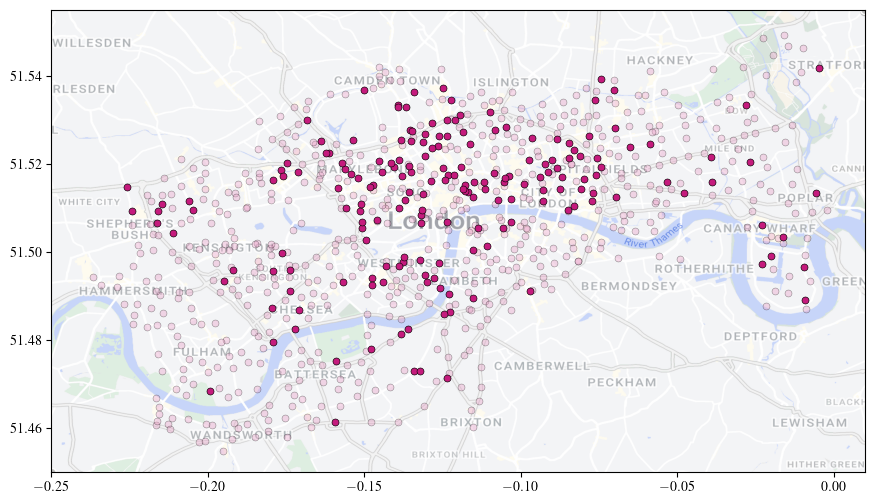

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Lato']})
rc('text', usetex=True)

import pandas as pd
import numpy as np
import pickle
import matplotlib.colors as mcolors

time_idx = 100
# Load the group assignments
group_memberships = pickle.load(open(f"data/santander_bikes/output/group_memberships/group_memberships_inf_graph.pkl", "rb"))

# Load location and name data
station_long_lat = pickle.load(open("data/santander_bikes/get_and_process_data/network_to_longitude_latitude_dict.pkl", "rb"))
station_names = pickle.load(open("data/santander_bikes/get_and_process_data/network_to_station_dict.pkl", "rb"))

# Create dataframe of station name and location
df_long_lat_stat = pd.DataFrame(index=range(791), columns=['station', 'longitude', 'latitude'])
for idx, long_lat in enumerate(station_long_lat.values()):
    if len(long_lat) > 0:
        df_long_lat_stat.loc[idx, ['longitude', 'latitude']] = long_lat[0]
for idx, name in enumerate(station_names.values()):
    if len(name) > 0:
        df_long_lat_stat.loc[idx, 'station'] = name[0]
df_long_lat_stat['node'] = df_long_lat_stat.index

# Create column for group assignment
B1 = 35
df_long_lat_stat['group'] = group_memberships[time_idx - B1, :]

# Map group index
value_mapping = {value: new_value for new_value, value in enumerate(df_long_lat_stat['group'].unique())}

# Map the original array to the new values
df_long_lat_stat['group'] = df_long_lat_stat['group'].map(value_mapping)

# Colour set
custom_colours = ['#c51b7d','#e9a3c9','#fde0ef','#e6f5d0','#a1d76a','#4d9221']

# Create a scatterplot with color proportional to the 'variable'
plt.figure(figsize=(10.5, 6))
scatter = plt.scatter(lons, lats, c=custom_colours[1],  
                      s=25, alpha=0.4, edgecolor='black', linewidth=0.4)
# Plot the changing nodes
scatter = plt.scatter(df_long_lat_stat.longitude[station_change[1]], 
                      df_long_lat_stat.latitude[station_change[1]], c=custom_colours[0],  
                      s=25, alpha=1., edgecolor='black', linewidth=0.4)
# Load the image you want to use as a background
background_image = mpimg.imread('data/santander_bikes/London.png')
plt.imshow(background_image, extent=[-0.25, 0.01, 51.45, 51.555], aspect='auto')

# Add labels and title
plt.xlim([-0.25, 0.01])
plt.ylim([51.45, 51.555])

# Show the plot
plt.savefig('data/santander_bikes/output/plots/post_lockdown_changes.pdf',bbox_inches='tight', pad_inches=0.1)
plt.show()

In [528]:
lons[np.array([1,2,3])]

TypeError: only integer scalar arrays can be converted to a scalar index